## TP sur la transformation de variables en regression lineaire

Dans ce TP, votre objectif est d'explorer differentes transformations de variables et de voir
leur effet sur l'apprentissage des coefficients et les performances de la regression. 

On utilise les memes donnees que pour le premier TP sur la regression lineaire, a savoir:

   https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

Ce jeu de donnees a deja ete charge sous la forme d'un dataframe avec pandas, qui a ete 
ensuite separe en une matrice X contenant les variables explicatives et un vecteur Y contenant la variable a expliquer (MEDV). Par ailleurs, X et Y ont ete aleatoirement divises en un jeu de donnees d'apprentissage (X_train et Y_train), qui serviront a estimer les parametres des modeles, et un jeu de test (X_test et Y_test) pour evaluer les performances du modele sur des donnees non vues a l'apprentissage. 2/3 des donnees sont utilisees pour l'apprentissage et 1/3 pour le test. 

In [2]:
# module import
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

In [5]:
# load data and basic analysis
import os
data_path = "housing.data"
names_path = "housing.names"

boston_df = pd.read_table(data_path, sep="\s+", header=None)
boston_df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", \
                       "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
print(boston_df.head())

NameError: name 'pd' is not defined

In [5]:
# basic stats
print(boston_df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [6]:
# separate data into X (explonatory variables) and Y (target)
X = boston_df.drop('MEDV', axis=1)
Y = boston_df['MEDV']

# split dataset into train/test
from sklearn import model_selection
#X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

On utilise l'implementation de la regression lineaire fourni par sklearn (avec l'option 
fit_intercept=True) pour estimer une premiere regression sur les variables d'origine, sans transformation des variables. C'est le meme modele que lors du precedent TP sur la regression lineaire ;-) On calcule ensuite son erreur quadratique moyenne (EQM) sur le jeu d'apprentissage et sur le jeu de test. 

In [7]:
# sklearn linear regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, Y_train)

Y_hat = lm.predict(X_test)

#print(lm.coef_, lm.intercept_)

var_names = boston_df.columns.drop('MEDV')
#print(sorted(list(zip(var_names,lm.coef_)),key=lambda x:x[1]))

In [8]:
# mean square error
Y_train_hat = lm.predict(X_train)
print("Train MSE:", np.mean((Y_train_hat-Y_train)**2) )
print("Test MSE:", np.mean((Y_hat-Y_test)**2) )

Train MSE: 19.5467584735
Test MSE: 28.530458766


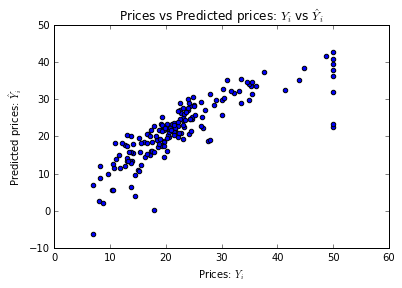

In [9]:
# plot predictions against ground-truth values
plt.scatter(Y_test, Y_hat)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [10]:
# plot residuals against true Y values
#plt.scatter(Y_hat, Y_hat-Y_test)
#plt.xlabel("predictions")
#plt.ylabel("residuals")
#plt.title("residual plot")
#plt.show()

### Partie 1: Transformations quadratique et cubique

Pour rappel, l'ensemble des hypotheses d'une regression lineaire a $d$ variables explicatives sont des hyperplans (cad, des surfaces lineaires) dans $R^d$. Mais, comme vu en cours, on appliquer des transformations a ces variables de maniere a modifier, voire a elargir, cet espace d'hypotheses, tout en preservant la linearite du modele (puisque le modele est toujours lineaire en ces parametres). 

Dans un premier temps, on s'interesse a des transformations simples des variables de type:
- $(x_1,x_2,\ldots,x_d) \overset{\Phi}{\longrightarrow} (x_1^2,x_2^2,\ldots,x_d^2)$
- $(x_1,x_2,\ldots,x_d) \overset{\Phi}{\longrightarrow} (x_1^3,x_2^3,\ldots,x_d^3)$

Les modeles de regression qui en resultent prennent donc la forme suivante, respectivement:
- $y = w_1 x_1^2 + w_2 x_2^2 + \ldots + w_d x_d^2 + w_0$ 
- $y = w_1 x_1^3 + w_2 x_2^3 + \ldots + w_d x_d^3 + w_0$ 

Appliquer chacune de ces transformations aux donnees X_train (et X_test).

Estimer les parametres de ces nouveaux modeles de regression, evaluer leurs performances en termes d'erreur quadratique moyenne (EQM), d'abord sur les donnees d'apprentissage (X_train, Y_train) puis sur les donnees non vues de test (X_test, Y_test). Comparer vos resultats aux resultats obtenus avec le modele lineaire sans transformation des variables. Qu'observez-vous? 

### Partie 2: Transformations polynomiales

Envisageons un autre type de transformation ou l'on remplace chaque variable $x_i$ par son polynome de degre $d>1$. Par exemple, pour $d = 2$, on obtient la transformation suivante pour une entree a 2 dimensions: 

$(x_1, x_2) \overset{\Phi^2}{\longrightarrow} (x_1, x_2, x_1^2, x_2^2, 2x_1 x_2)$

De la mene maniere, pour $d=3$, on obtient:

$(x_1, x_2) \overset{\Phi^3}{\longrightarrow} (x_1, x_2, x_1^2, x_2^2, x_1^3, x_2^3, 2x_1 x_2, 3x_1^2 x_2, 3x_1 x_2^2)$

Et ainsi de suite. 

a) Ecrire les modeles de regression associes a $d = 2$ et $d = 3$. 

b) Appliquer les transformations polynomiales d'ordre $d = 2$ aux donnees, estimer une regression lineaire sur ces donnees et comparer l'erreur quadratique moyenne (EQM) avec le modele sans tranformation ($d = 1$), a la fois sur les donnees d'apprentissage  et sur les donnees de test. Comparer egalement le nombre de parametres du modele. Commentez. 

c) Repeter avec $d = 3$. 

d) Repeter avec $d = 4$.

e) Visualiser les EQM par rapport au degre du polynome. Qu'observez-vous? 

Astuce: ce type de transformations sont disponibles dans le module preprocessing de sklearn. Par exemple:  

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
X_train_p2 = poly2.fit_transform(X_train)